# Exercise 6: More plotting options

In this homework, you'll practice more advanced plotting options from `ggplot`.

Just like the prior homework, we will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/index.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Multipanel figures (7 points)

Last week, we visualized the change in life expectancy over time for every country in one plot. An alternative method is to use facet panels to split each country into its own plot.

To start, load the `gapminder` dataset from the last set of exercises, as well as the `tidyverse`.

In [ ]:
# Install if needed
install.packages("gapminder")

# Load the packages
library(tidyverse)
library(gapminder)

head(gapminder)




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Next, create a subset of data that only includes the 25 countries from the `Americas` continent. Now we can add a `facet_wrap` layer to our line plot to create the panels by country. Additionally, to make the x-axis values easier to read, add a `theme` layer to rotate the text by 45 degrees.

[1] Argentina           Bolivia             Brazil             
 [4] Canada              Chile               Colombia           
 [7] Costa Rica          Cuba                Dominican Republic 
[10] Ecuador             El Salvador         Guatemala          
[13] Haiti               Honduras            Jamaica            
[16] Mexico              Nicaragua           Panama             
[19] Paraguay            Peru                Puerto Rico        
[22] Trinidad and Tobago United States       Uruguay            
[25] Venezuela          
142 Levels: Afghanistan Albania Algeria Angola Argentina Australia ... Zimbabwe

[1] 25

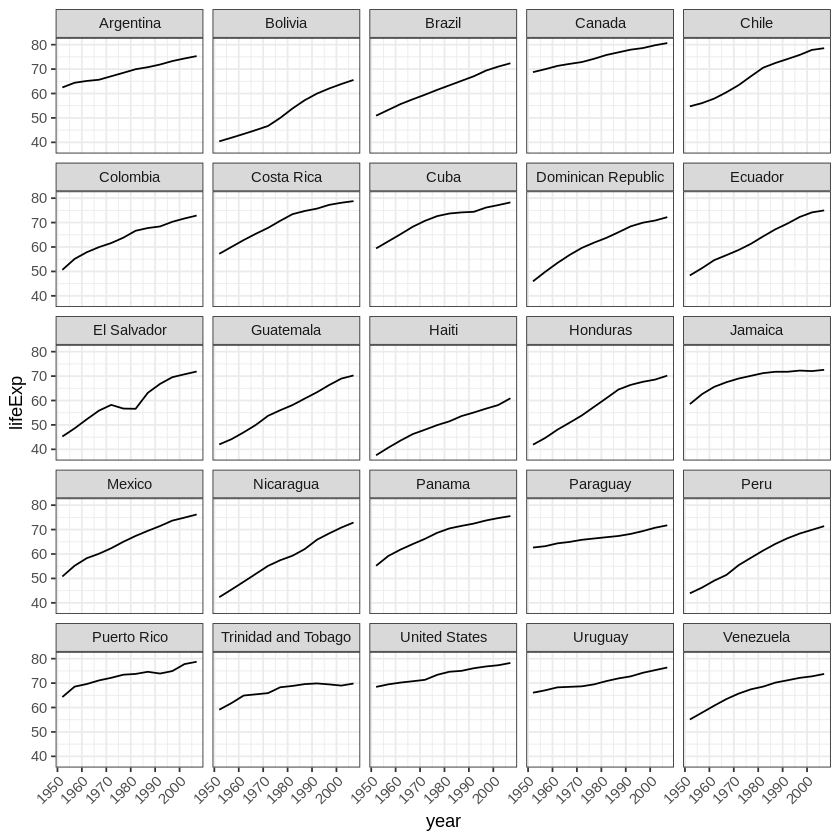

In [ ]:
americas_data <- gapminder %>%
  filter(continent == "Americas")
unique(americas_data$country)
length(unique(gapminder$country[gapminder$continent == "Americas"]))

# Create the faceted line plot
ggplot(americas_data, aes(x = year, y = lifeExp)) +
  geom_line() +
  facet_wrap(~country) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Imagine that we wanted to publish this figure in a manuscript. Make the following changes to the code from the previous question to create a cleaner figure:

* Change the y-axis label (using `labs` layer)
* Add a figure title (using `labs` layer)
* Add a legend (using `labs` layer)
* Rotate x-axis value text to 90 degrees

*Hint: legend titles are set using the same names used in the aes specification. So, we need to add a `color` aes mapping to the global plot definition and reference this in the `labs` layer to specify the legend name.*

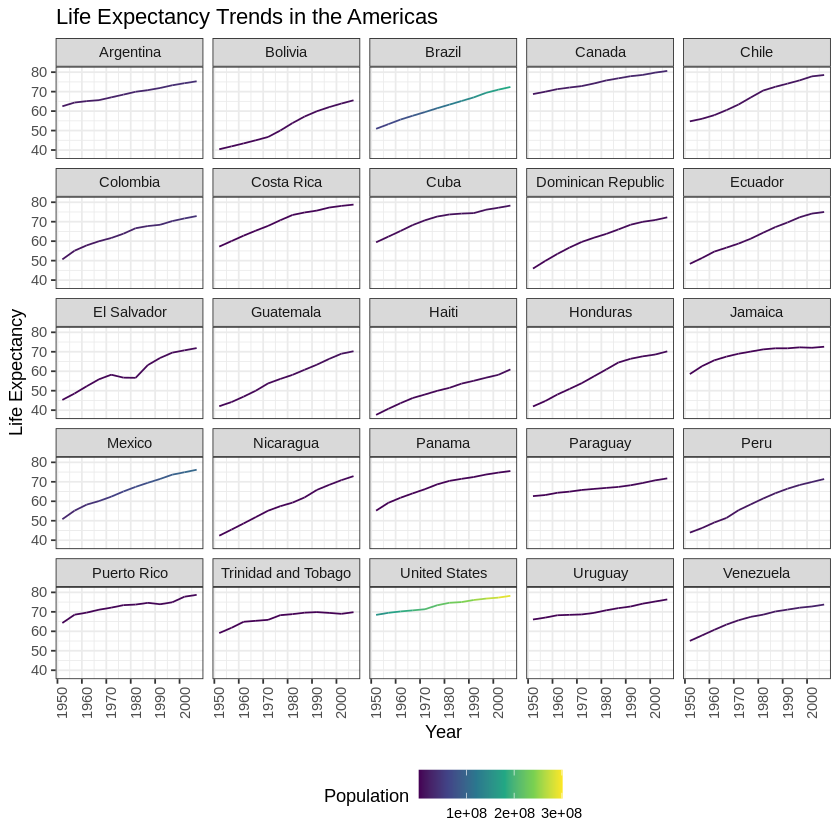

In [41]:
americas_data <- gapminder %>%
  filter(continent == "Americas")

# Fine-tune faceted line plot from above
ggplot(americas_data, aes(x = year, y = lifeExp, color = pop)) +
  geom_line() +
  facet_wrap(~country, ncol = 5) +
  scale_color_viridis_c() +  # Uses viridis color scale for continuous values
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position = "bottom") +
  labs(title = "Life Expectancy Trends in the Americas",
       x = "Year",
       y = "Life Expectancy",
       color = "Population")




Now let's look at how life expectancy varies by continent over time. Create a multipanel figure where each panel contains five boxplots (one for each continent) and each panel represents one year of data. Include a legend instead of x-axis title and labels.

*Hint: the `theme` layer allows you to set attributes as `element_blank()`.*

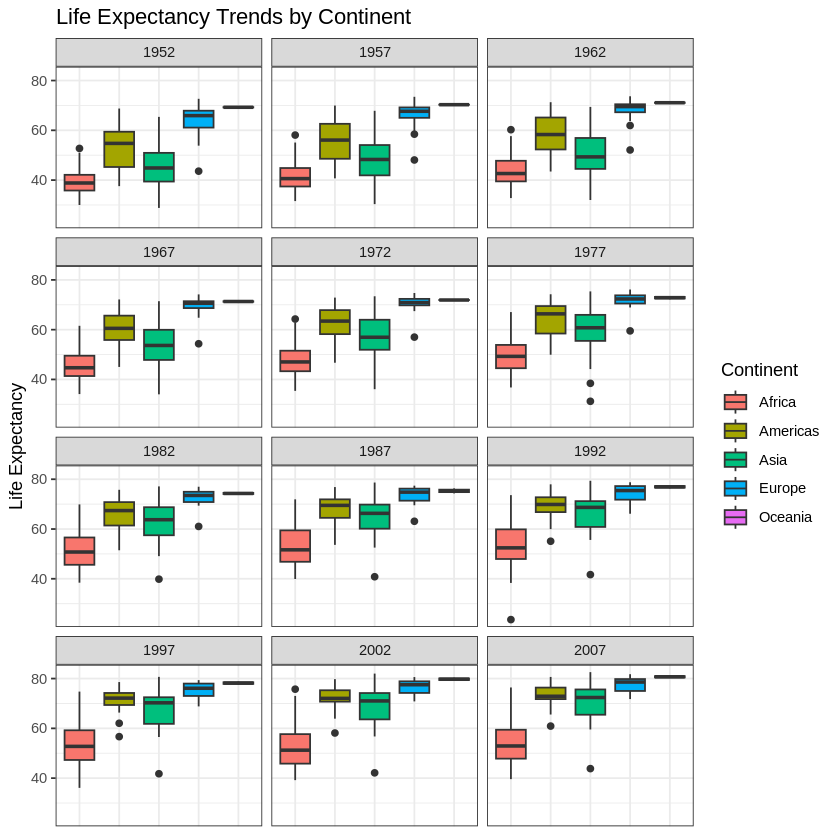

In [45]:

# life expectancy varies by continent over time
ggplot(gapminder, aes(x = continent, y = lifeExp, fill = continent)) +
  geom_boxplot() +
  facet_wrap(~year, ncol = 3) +
  scale_color_viridis_c() +  # Uses viridis color scale for continuous values
  theme_bw() +
  theme(axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        legend.position = "right",
        axis.ticks.x = element_blank()) +
  labs(title = "Life Expectancy Trends by Continent",
       y = "Life Expectancy",
       fill = "Continent")  # Legend title





---
# 2. Increasing data density (3 pts)

The above plots have nice readability, but they probably use more ink than is necessary. Take your boxplots from the last question and edit them to improve the data-to-ink ratio.

Hint: Double check your axis labels!

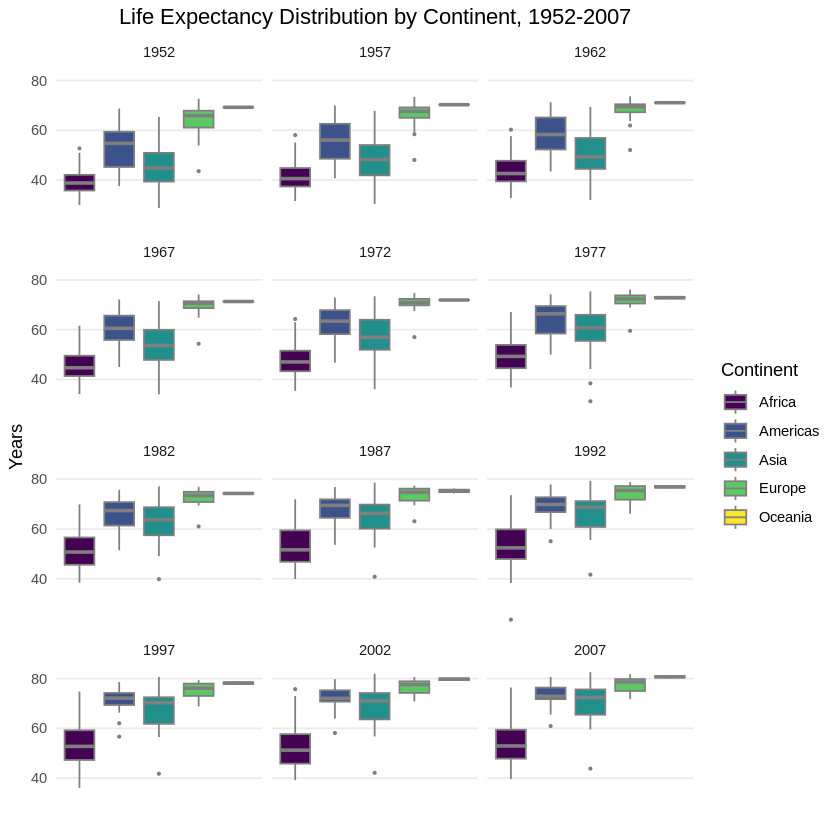

In [46]:
# life expectancy varies by continent over time
ggplot(gapminder, aes(x = continent, y = lifeExp, fill = continent)) +
  geom_boxplot(outlier.size = 0.5, color = "gray50") +
  facet_wrap(~year, ncol = 3) +
  scale_fill_viridis_d() +  # Uses viridis color scale for discrete values
  theme_minimal() +
  theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        legend.position = "right",
        panel.grid.minor = element_blank(),    # Remove minor gridlines
        panel.grid.major.x = element_blank(),  # Remove vertical gridlines
        strip.background = element_blank(),    # Remove facet label background
        plot.title = element_text(hjust = 0.5) # Center the title
        ) +
  labs(title = "Life Expectancy Distribution by Continent, 1952-2007",
        y = "Years",
        fill = "Continent")  # Legend title




**DUE:** 5pm EST, Feb 19, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *As always, I worked with my tutor, claude.ai*